In [1]:
datadir='/data/public/monusac/MoNuSAC_images_and_annotations/'

In [2]:
import glob

In [40]:
import cv2
import os
from matplotlib import pyplot as plt
from skimage.io import imread
import numpy as np
from shapely.geometry import Polygon

ModuleNotFoundError: No module named 'shapely'

In [6]:
folders = os.listdir(datadir)

In [8]:
imgs=glob.glob(datadir+'/'+folders[0]+'/*.svs')

In [9]:
imgs

['/data/public/monusac/MoNuSAC_images_and_annotations//TCGA-55-1594-01Z-00-DX1/TCGA-55-1594-01Z-00-DX1_001.svs',
 '/data/public/monusac/MoNuSAC_images_and_annotations//TCGA-55-1594-01Z-00-DX1/TCGA-55-1594-01Z-00-DX1_002.svs',
 '/data/public/monusac/MoNuSAC_images_and_annotations//TCGA-55-1594-01Z-00-DX1/TCGA-55-1594-01Z-00-DX1_003.svs',
 '/data/public/monusac/MoNuSAC_images_and_annotations//TCGA-55-1594-01Z-00-DX1/TCGA-55-1594-01Z-00-DX1_004.svs',
 '/data/public/monusac/MoNuSAC_images_and_annotations//TCGA-55-1594-01Z-00-DX1/TCGA-55-1594-01Z-00-DX1_005.svs']

In [13]:
im1=cv2.imread(imgs[0].replace('.svs','.tif'))

In [14]:
im1.shape

(1024, 1024, 3)

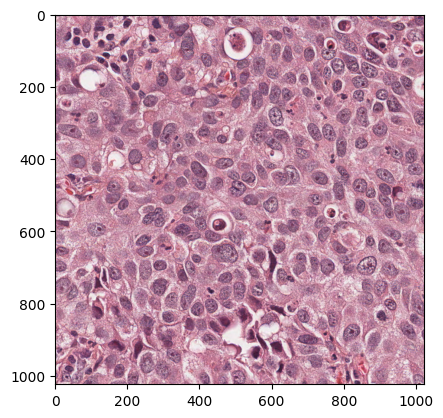

In [22]:
plt.imshow(np.dstack((im1[...,0],im1[...,1],im1[...,2])))

In [23]:
import openslide

In [34]:
imgs[0]

'/data/public/monusac/MoNuSAC_images_and_annotations//TCGA-55-1594-01Z-00-DX1/TCGA-55-1594-01Z-00-DX1_001.svs'

In [24]:
img=openslide.OpenSlide(imgs[0])

In [27]:
tmp=np.array(img.read_region((0,0),0,img.level_dimensions[0]))

In [28]:
tmp.shape

(1024, 1024, 4)

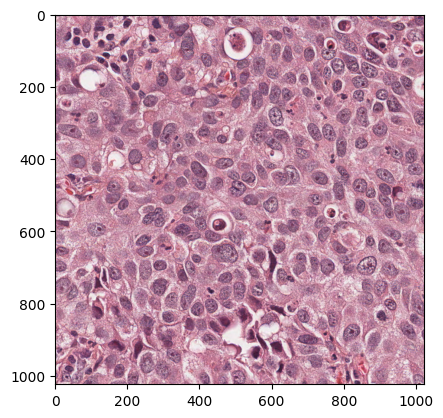

In [35]:
plt.imshow(tmp[...,:3]) #,cmap='gray')

In [37]:
from xml.etree import ElementTree as ET
tree = ET.parse(imgs[0].replace('.svs','.xml'))
root = tree.getroot()


In [42]:
from skimage import draw

In [54]:
# make as xml to dict, dict to labelmap

# count = 0
gt = 0

objects = {}

for k in range(len(root)):
    label = [x.attrib['Name'] for x in root[k][0]]
    label = label[0]

    for child in root[k]:
        for x in child:
            r = x.tag
            if r == 'Attribute':
                # count = count+1
                # print(count)
                label = x.attrib['Name']
                if label not in objects:
                    objects[label]=[]
                # n_ary_mask = np.transpose(np.zeros((img.read_region((0,0),0,img.level_dimensions[0]).size))) 
                print(label)
                
            if r == 'Region':
                # regions = []
                vertices = x[1]
                # print(len(vertices))
                coords = np.zeros((len(vertices), 2))
                for i, vertex in enumerate(vertices):
                    coords[i][0] = vertex.attrib['X']
                    coords[i][1] = vertex.attrib['Y']        
                # regions.append(coords)
                objects[label].append(coords)
                # poly = Polygon(regions[0])  

#                 vertex_row_coords = regions[0][:,0]
#                 vertex_col_coords = regions[0][:,1]
#                 fill_row_coords, fill_col_coords = draw.polygon(vertex_col_coords, vertex_row_coords, n_ary_mask.shape)
#                 gt = gt+1 #Keep track of giving unique valu to each instance in an image
#                 n_ary_mask[fill_row_coords, fill_col_coords] = gt
                
                 

Epithelial
Lymphocyte
Neutrophil
Macrophage


In [55]:
len(objects['Epithelial'])

231

In [56]:
ob1=objects['Epithelial'][0]

In [57]:
ob1

array([[372., 551.],
       [372., 551.],
       [372., 551.],
       [370., 551.],
       [369., 551.],
       [368., 552.],
       [368., 552.],
       [366., 553.],
       [366., 553.],
       [364., 553.],
       [364., 553.],
       [362., 554.],
       [362., 554.],
       [360., 554.],
       [360., 554.],
       [358., 553.],
       [358., 553.],
       [356., 552.],
       [356., 551.],
       [354., 550.],
       [354., 550.],
       [353., 548.],
       [353., 547.],
       [353., 546.],
       [353., 545.],
       [353., 544.],
       [353., 543.],
       [353., 542.],
       [354., 541.],
       [354., 539.],
       [354., 539.],
       [355., 537.],
       [355., 536.],
       [355., 535.],
       [356., 534.],
       [356., 533.],
       [357., 532.],
       [358., 531.],
       [358., 530.],
       [359., 529.],
       [360., 529.],
       [360., 528.],
       [361., 527.],
       [362., 527.],
       [364., 526.],
       [364., 525.],
       [366., 525.],
       [366.,

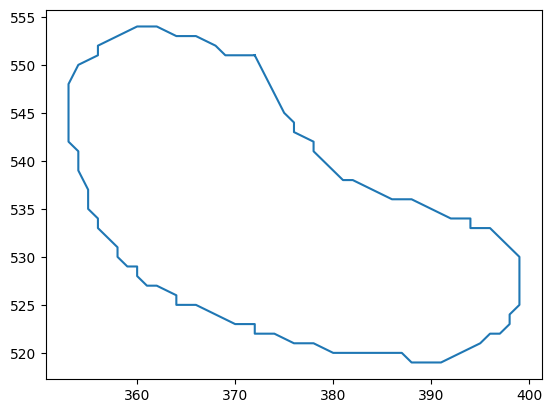

In [58]:
plt.plot(ob1[:,0],ob1[:,1])

In [45]:
n_ary_mask.shape

(1024, 1024)

In [47]:
n_ary_mask.min()

0.0